In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Language analysis

In [2]:
df = pd.read_csv('../data/words_with_translation_corrected.csv', sep = ';', parse_dates= True)

In [3]:
df = df.replace('German', 'german')

In [4]:
df.head()

,date,word,language,month,Leo_months,en_word
0,2020-08-07,Mama,neutral,2020-08,9,Mama
1,2020-09-24,agua,spanish,2020-09,11,Water
2,2020-10-07,Abuela,spanish,2020-10,11,Grandmother
3,2020-10-31,luna,spanish,2020-10,12,Moon
4,2020-11-05,Banane,german,2020-11,12,banana


### Color dictionary

In [314]:
colors = ['#F28123','#A9F0D1','#82A0BC']

In [315]:
colors_dic = {'spanish':'#F28123', 'german':'#A9F0D1', 'neutral':'#82A0BC'}

In [316]:
colors_dic['spanish']

'#F28123'

### Language distribution of total words

Done in other notebook.

### Same words different language

- Translate all to english: done
    - Check & correct: done
- Find duplicates:
    - also tells y
- Check how often spa/ger were first
    - make hypothesis on why?
- Plot in distance with arcs connecting

In [8]:
len(df.word.unique())

946

In [9]:
df = df.drop_duplicates(subset= 'word', keep = 'first')

In [10]:
df.en_word = df.en_word.str.lower()

In [11]:
len(df.en_word.unique())

805

In [12]:
df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])

,date,word,language,month,Leo_months,en_word
1,2020-09-24,agua,spanish,2020-09,11,water
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother
3,2020-10-31,luna,spanish,2020-10,12,moon
6,2020-11-18,Ball,german,2020-11,13,ball
8,2020-11-23,no,spanish,2020-11,13,no
...,...,...,...,...,...,...
981,2022-01-14,ándale,spanish,2022-01,26,come along
991,2022-01-16,Welt,german,2022-01,26,world
994,2022-01-16,paja,spanish,2022-01,26,straw
990,2022-01-16,weit,german,2022-01,26,far


In [13]:
duplicated_concepts = df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])

In [14]:
concepts = df[df.duplicated(subset = 'en_word', keep = False)].sort_values(by = ['date'])['en_word'].unique()

In [15]:
word_order = np.arange(len(df[df.duplicated(subset = 'en_word', keep = 'first')]))+1

In [16]:
word_order_dict = dict(zip(concepts,word_order))

In [17]:
duplicated_concepts

,date,word,language,month,Leo_months,en_word
1,2020-09-24,agua,spanish,2020-09,11,water
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother
3,2020-10-31,luna,spanish,2020-10,12,moon
6,2020-11-18,Ball,german,2020-11,13,ball
8,2020-11-23,no,spanish,2020-11,13,no
...,...,...,...,...,...,...
981,2022-01-14,ándale,spanish,2022-01,26,come along
991,2022-01-16,Welt,german,2022-01,26,world
994,2022-01-16,paja,spanish,2022-01,26,straw
990,2022-01-16,weit,german,2022-01,26,far


In [18]:
duplicated_concepts['order'] = duplicated_concepts['en_word'].map(word_order_dict)

In [19]:
duplicated_concepts.sort_values(by = 'order').head()

,date,word,language,month,Leo_months,en_word,order
1,2020-09-24,agua,spanish,2020-09,11,water,1
100,2021-04-22,Wasser,german,2021-04,18,water,1
42,2021-02-15,Oma,german,2021-02,15,grandmother,2
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother,2
3,2020-10-31,luna,spanish,2020-10,12,moon,3


In [20]:
duplicated_concepts.loc[duplicated_concepts['language'] == 'neutral']

,date,word,language,month,Leo_months,en_word,order
61,2021-03-15,bubbles,neutral,2021-03,16,bubbles,23
117,2021-04-30,bye,neutral,2021-04,18,bye,13


In [21]:
word = 'water'

In [22]:
# y axis

In [23]:
duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order

1

In [24]:
#x start

In [25]:
duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months

11

In [26]:
# x end

In [27]:
duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months

18

In [28]:
duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language

'spanish'

In [29]:
colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]

'#F28123'

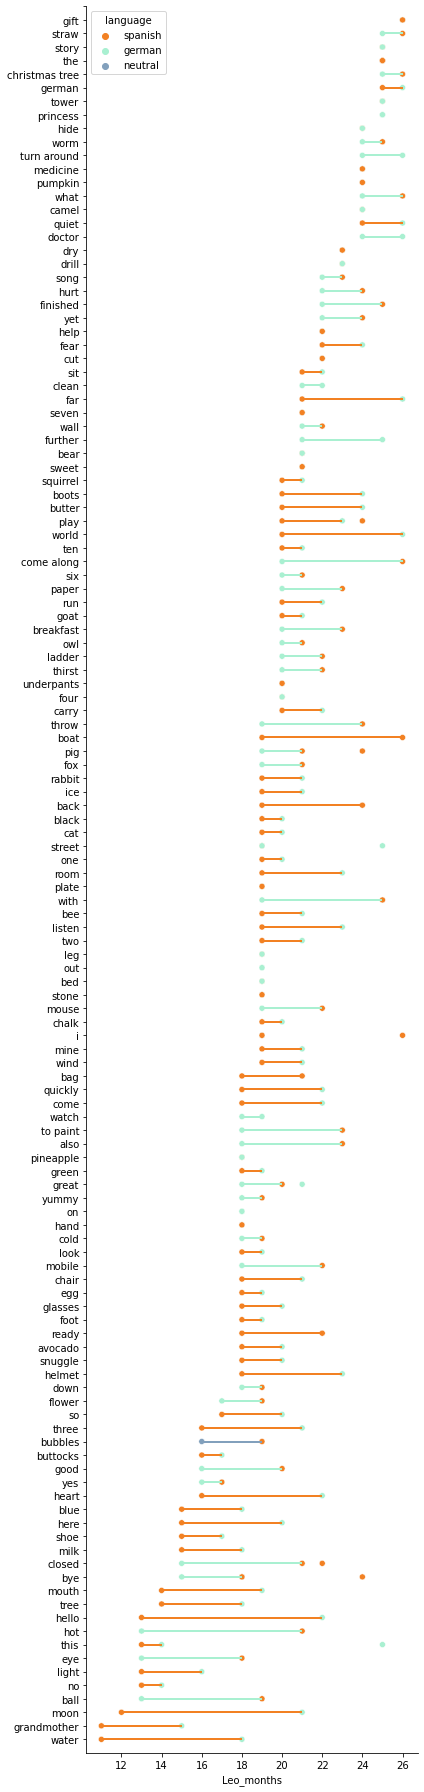

In [317]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,25))
ax = sns.scatterplot(data = duplicated_concepts, 
               x = 'Leo_months', 
               y = 'order', 
               hue = 'language',
               palette = colors)

major_ticks = np.arange(1, 130, 1)

ax.set_ylim(0, 128)
ax.set_yticks(major_ticks)
ax.set_yticklabels(concepts)
ax.set_ylabel("")

# And a corresponding grid
#ax.grid(which='major', axis = 'y')
sns.despine()

word = 'water'
for word in concepts:
    y = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order
    x_start = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months
    x_end = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months
    color = colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]
    ax.hlines(y, x_start, x_end, color, linewidth=2)

plt.tight_layout()
plt.savefig('concepts_first_language.png')

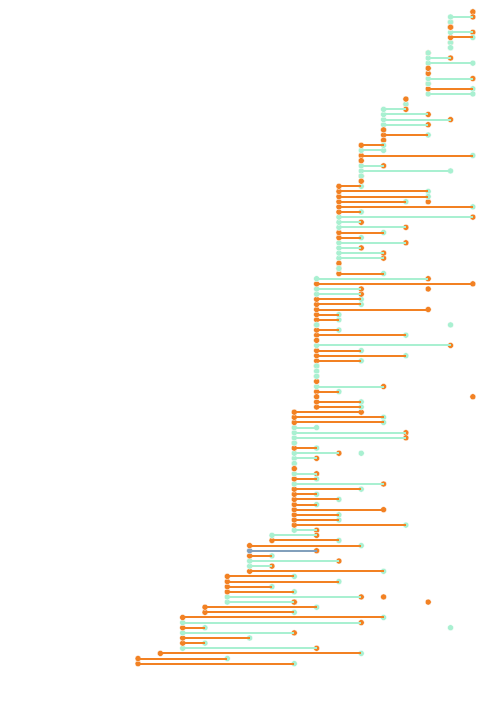

In [328]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (7,10))
ax = sns.scatterplot(data = duplicated_concepts, 
               x = 'Leo_months', 
               y = 'order', 
               hue = 'language',
               palette = colors,
               legend = False)

major_ticks = np.arange(1, 130, 1)

ax.set_ylim(0, 128)
ax.set_yticks(major_ticks)
ax.set_yticklabels(concepts)
ax.set_ylabel("")
ax.set_xlabel("Kid's months")

# And a corresponding grid
#ax.grid(which='major', axis = 'y')
sns.despine()

word = 'water'
for word in concepts:
    y = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order
    x_start = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months
    x_end = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months
    color = colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]
    ax.hlines(y, x_start, x_end, color, linewidth=2)
    
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticks(np.arange(10,27,1))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)
plt.tight_layout()
plt.savefig('concepts_first_language_presentation.png',transparent=True)

In [31]:
concepts[0:10]

array(['water', 'grandmother', 'moon', 'ball', 'no', 'light', 'eye',
       'this', 'hot', 'hello'], dtype=object)

In [32]:
first_ten = duplicated_concepts.loc[duplicated_concepts.en_word.isin(concepts[0:10])]

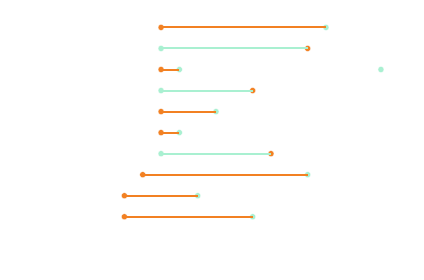

In [339]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (6,4))
ax = sns.scatterplot(data = first_ten, 
               x = 'Leo_months', 
               y = 'order', 
               hue = 'language',
               palette = colors[0:2],
               legend = False)

major_ticks = np.arange(1, 11, 1)

ax.set_ylim(0, 11)
ax.set_xlim(10, 27)
ax.set_xticks(np.arange(10,27,1))
ax.set_yticks(major_ticks)
ax.set_yticklabels(concepts)
ax.set_ylabel("")
ax.set_xlabel("Kid's months")
ax.tick_params(axis='both', which='major', labelsize=14)
ax.set_xticks(np.arange(10,27,1))
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.tick_params(axis='x', colors='white', width=2)
ax.tick_params(axis='y', colors='white', width=2)

# And a corresponding grid
#ax.grid(which='major', axis = 'y')
sns.despine()

for word in concepts[0:10]:
    y = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].order
    x_start = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].Leo_months
    x_end = duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[1].Leo_months
    color = colors_dic[duplicated_concepts.loc[duplicated_concepts.en_word == word].reset_index().iloc[0].language]
    ax.hlines(y, x_start, x_end, color, linewidth=2)

plt.tight_layout()
plt.savefig('concepts_first_language_first months.png', transparent = True)

#### First words by month

In [34]:
df[df.duplicated(subset = 'en_word', keep= 'last')].sort_values(by = 'date')

,date,word,language,month,Leo_months,en_word
1,2020-09-24,agua,spanish,2020-09,11,water
2,2020-10-07,Abuela,spanish,2020-10,11,grandmother
3,2020-10-31,luna,spanish,2020-10,12,moon
6,2020-11-18,Ball,german,2020-11,13,ball
8,2020-11-23,no,spanish,2020-11,13,no
...,...,...,...,...,...,...
896,2021-12-08,los,spanish,2021-12,25,the
897,2021-12-08,la,spanish,2021-12,25,the
898,2021-12-08,Geschichte,german,2021-12,25,story
911,2021-12-12,Stroh,german,2021-12,25,straw


In [35]:
df[df.duplicated(subset = 'en_word', keep= 'last')].groupby(['Leo_months'])['word'].count()

Leo_months
11     2
12     1
13     7
14     3
15     6
16     6
17     2
18    27
19    28
20    19
21    10
22     7
23     3
24     9
25    10
26     1
Name: word, dtype: int64

In [36]:
dominant_language = df[df.duplicated(subset = 'en_word', keep= 'last')].\
                    groupby(['Leo_months','language'])['word'].\
                    count().to_frame().unstack().fillna(0)

In [37]:
dominant_language.columns = dominant_language.columns.droplevel()

In [38]:
dominant_language.head()

language,german,neutral,spanish
Leo_months,,,
11,0.0,0.0,2.0
12,0.0,0.0,1.0
13,3.0,0.0,4.0
14,1.0,0.0,2.0
15,2.0,0.0,4.0


In [39]:
dominant_language = dominant_language.drop('neutral', axis = 1)

In [40]:
dominant_language

language,german,spanish
Leo_months,,
11,0.0,2.0
12,0.0,1.0
13,3.0,4.0
14,1.0,2.0
15,2.0,4.0
16,2.0,3.0
17,1.0,1.0
18,10.0,16.0
19,10.0,18.0


In [41]:
dominant_language['german_percentage'] = round(dominant_language['german']/
                                               dominant_language[['german', 'spanish']].sum(axis = 1),2)*100

In [42]:
dominant_language['spanish_percentage'] = round(dominant_language['spanish']/
                                                dominant_language[['german', 'spanish']].sum(axis = 1),2)*100

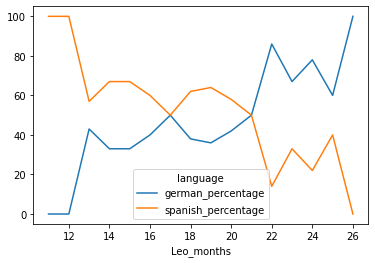

In [43]:
dominant_language[['german_percentage','spanish_percentage' ]].plot()

#### Further ideas
- By month, which percentage of words are new words
- Time span before learning words in 2 languages

### Expansion of semantic space

- Get word vectors for every word
    - Q: What to do with compound words? 'Get out?'
        - Take average?
        - Use both?
- Make PCA 
+ Clustering?
    - Hopefully identify clear groups
- Plot in time
    - and with the language used

In [87]:
concepts_df = df.drop_duplicates(subset= 'en_word', keep = 'first')

In [45]:
import spacy

In [46]:
nlp = spacy.load('en_core_web_md')

In [47]:
df['en_word'][0]

'mama'

In [48]:
doc = nlp(df['en_word'][0])

In [49]:
[token.lemma_ for token in nlp("you're welcome") if not token.is_stop][0]

'welcome'

In [50]:
[token.lemma_ for token in nlp('let’s go') if not token.is_stop]

['let']

In [51]:
pd.DataFrame([nlp(df['en_word'][13])[1].vector, nlp(df['en_word'][13])[0].vector]).mean()

0     -0.698545
1      0.095867
2      0.110095
3      0.695700
4     -0.222163
         ...   
295    0.041885
296   -0.158647
297   -0.476730
298    0.275600
299    0.272685
Length: 300, dtype: float64

In [52]:
np.mean([-0.62388,-0.77321])

-0.698545

In [53]:
## function

In [55]:
[token.lemma_ for token in nlp('to go')]

['to', 'go']

In [56]:
len(nlp('to go'))

2

In [57]:
nlp('marta')[0].is_oov 

False

In [58]:
nlp('pepe')[0].is_oov 

False

In [60]:
concepts_v = []
vectors = []
for concept in list(df['en_word']):
    if len(nlp(concept)) > 1:
        lemma_ = [token.lemma_ for token in nlp(concept) if not token.is_oov][0]
    else: 
        lemma_ = [token.lemma_ for token in nlp(concept)][0]
    if nlp(lemma_)[0].is_oov == False:
        vectors.append(nlp(lemma_).vector)
        concepts_v.append(concept)

In [61]:
df_vec = pd.DataFrame(vectors)

In [62]:
df_vec['concept'] = concepts_v

In [63]:
df_vec

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,concept
0,-0.038662,-0.171320,-0.060793,0.360240,0.108920,0.311140,0.245320,-0.58040,0.150580,0.83558,...,0.136710,-0.092258,0.45823,0.847740,0.100910,-0.094336,0.34869,-0.152380,-0.487900,mama
1,-0.036665,0.201060,0.285100,-0.432460,-0.395450,0.309870,-0.791590,0.41187,-0.332710,1.93790,...,-0.469940,0.233210,-0.69223,-0.128010,0.460700,-0.566770,-0.34485,0.167980,-0.169520,water
2,0.261310,0.275300,-0.328270,0.687400,-0.052246,-0.093345,0.475050,-0.54182,-0.059537,2.78490,...,0.149450,0.013548,0.76875,0.444510,-0.122020,0.245260,0.14553,0.063300,-0.091110,grandmother
3,-0.018247,-0.295180,-0.092399,0.072396,-0.249910,0.085404,-0.262680,0.50399,-0.042881,1.35530,...,0.407150,0.142610,-0.10119,0.066653,0.189320,-0.504630,0.12478,0.336190,0.026979,moon
4,0.202280,-0.076618,0.370320,0.032845,-0.419570,0.072069,-0.374760,0.05746,-0.012401,0.52949,...,0.366850,0.002525,-0.64009,-0.297650,0.789430,0.331680,-1.19660,-0.047156,0.531750,banana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,0.572150,0.503000,0.068908,-0.416830,0.081836,0.009009,0.219100,-0.16711,0.348460,1.96340,...,0.406620,0.149770,-0.20387,-0.028436,-0.280750,0.408890,0.59051,-0.030667,-0.262740,driving
925,-0.696890,0.062715,-0.055077,0.427980,-0.506830,0.404390,0.441190,-0.37545,-0.060242,1.49850,...,0.223600,0.021548,0.14209,0.235580,0.367400,-0.414000,0.23124,-0.484320,0.287280,rant
926,-0.435260,-0.473630,-0.169930,0.037953,0.143430,0.008942,0.532130,-0.29075,0.028203,0.44459,...,0.166100,-0.107250,-0.48159,0.566960,-0.055976,0.185390,0.28410,-0.117500,0.112360,sniffles
927,0.331910,-0.248560,-0.178420,-0.133710,0.504450,-0.016468,-0.264270,-0.14870,-0.035293,2.08940,...,-0.731240,0.102730,-0.76016,0.127150,0.255580,-0.418300,0.12910,-0.173650,-0.486140,boat


#### PCA

In [64]:
from sklearn.decomposition import PCA

In [65]:
X = df_vec.drop('concept', axis = 1)

In [66]:
pca = PCA()

In [67]:
W = pca.fit_transform(X)

In [68]:
components = np.arange(1, W.shape[1]+1)

Text(0, 0.5, 'explained variance ratio [%]')

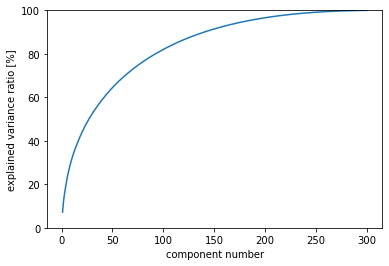

In [69]:
plt.plot(components, np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('component number')
plt.ylim(0,100)
plt.ylabel('explained variance ratio [%]')

Text(0, 0.5, 'PC 2')

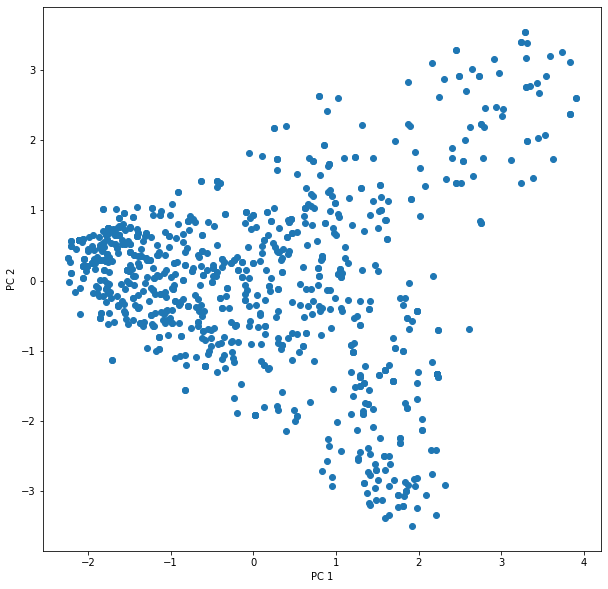

In [73]:
plt.figure(figsize = (10,10))
plt.scatter(W[:,0], W[:,1])
plt.xlabel(f'PC 1')
plt.ylabel(f'PC 2')

In [84]:
len(W[1])

300

In [86]:
concepts_pca = pd.DataFrame({'concept':df_vec['concept'], 'PC1':W[:,0], 'PC2': W[:,1]})

In [100]:
concepts_pca = pd.merge(concepts_pca, concepts_df, how = 'inner', left_on= 'concept', right_on= 'en_word').drop_duplicates(subset = 'en_word').drop('month', axis = 1)

In [103]:
concepts_pca.head()

,concept,PC1,PC2,date,word,language,Leo_months,en_word
0,mama,1.390317,-1.756981,2020-08-07,Mama,neutral,9,mama
1,water,0.252046,2.181514,2020-09-24,agua,spanish,11,water
3,grandmother,0.296874,-0.126159,2020-10-07,Abuela,spanish,11,grandmother
5,moon,0.605671,-0.938962,2020-10-31,luna,spanish,12,moon
7,banana,3.123302,1.712668,2020-11-05,Banane,german,12,banana


In [130]:
colors = ['#82A0BC','#F28123','#0099ab']

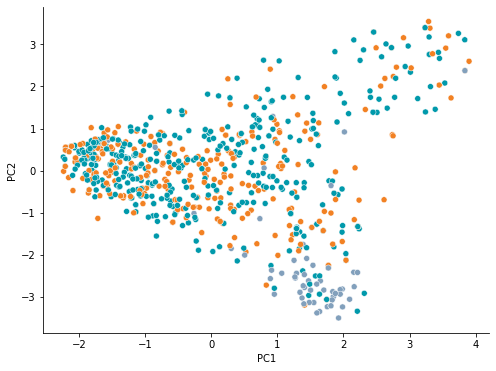

In [136]:
plt.figure(figsize= (8,6))
sns.scatterplot(data = concepts_pca,
               x = 'PC1',
               y = 'PC2',
               hue = 'language', 
               palette = colors, 
               legend= False)
sns.despine()

In [137]:
concepts_pca['word']

0            Mama
1            agua
3          Abuela
5            luna
7          Banane
          ...    
924    compartir 
925     Fahrtende
926     schimpfen
927     Schnupfen
928           nur
Name: word, Length: 788, dtype: object

In [144]:
list(concepts_pca['word'])

['Mama',
 'agua',
 'Abuela',
 'luna',
 'Banane',
 'Pepe',
 'Ball',
 'más',
 'no',
 'Mami',
 'luz',
 'Auge',
 'ups',
 'lechita',
 'este',
 'heiß',
 'hola',
 'Marta',
 'árbol',
 'boca',
 'kaputt',
 'tschüss',
 'wow',
 'zu',
 'Bob',
 'leche',
 'boobie',
 'sol',
 'zapato',
 'Aqui’sta',
 'uva',
 'azul',
 'niña',
 'Hüpf',
 'Achtung',
 'Bravo',
 'Nase',
 'Spieli',
 'gracias',
 'corazón',
 'ja',
 'otro',
 'casa',
 'papa',
 'Leo',
 'gut',
 'Hallo',
 'pompa',
 'Mario',
 'Sushi',
 'nube',
 'te',
 'Moni',
 'bubbles',
 'cielo',
 'tres',
 'muchacho',
 'calcetín',
 'Apfel',
 'pulpo',
 'Jonas',
 'asi',
 'ok',
 'chiquito',
 'Noam',
 'Nicola',
 'fuego',
 'Lotte',
 'queso',
 'bici',
 'Katrin',
 'Blume',
 'Pizza',
 'Pasta',
 'Markus',
 'Schlüssel',
 'Auerhahn',
 'Chu',
 'Abi',
 'caca',
 'Barbara',
 'naranja',
 'Auto',
 'Mühlabfur',
 'rojo',
 'essen',
 'yogur',
 'runter',
 'Abuelo',
 'Cashew',
 'Ana',
 'Taylor',
 'Ohr',
 'casco',
 'cariñito',
 'da',
 'Lina',
 'pan',
 'sopa',
 'anillo',
 'Sonja',
 'aguacate

In [356]:
highlight = ['Banane','Ball', 'perro', 'gato',
             'Geschichte', 'Leo', 'Mario', 'Nuss', 'Kaffee', 'Maus', 'leche', 'Pasta', 'aguacate', 'Mais', 'sopa',
             'Kuchen', 'Brötchen', 'huevo', 'Schnittlauch', 'Peter', 'Lotte', 'hormiga', 'oso', 'pulpo', 'pato', 'Schaf',
              'Abendessen', 'Frühstück', 'alle', 'klein', 'Buch', 'schwer', 'cuello', 'traurig', 'cable', 'pierna']

In [357]:
colors = ['#F28123','#A9F0D1','#82A0BC']

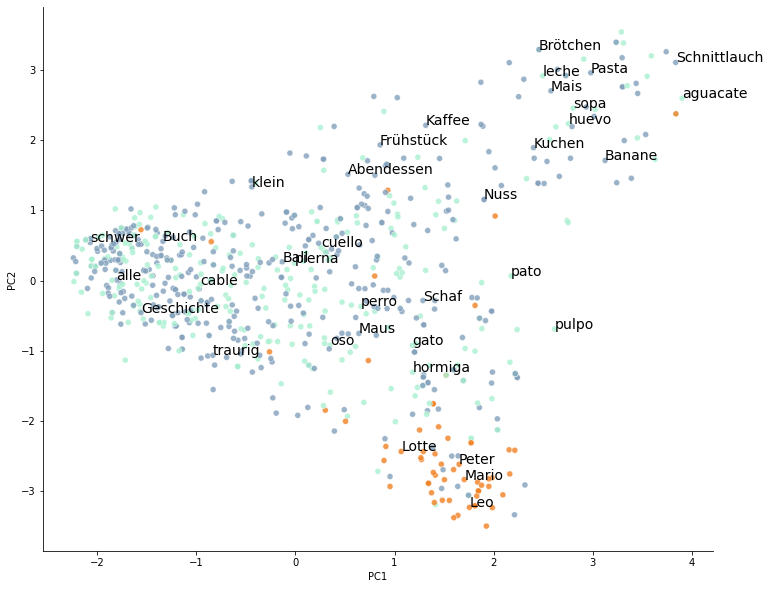

In [358]:
plt.figure(figsize= (12,10))
sns.scatterplot(data = concepts_pca,
               x = 'PC1',
               y = 'PC2',
               hue = 'language', 
               palette = colors, 
               legend= False, 
               alpha = 0.8)
sns.despine()
# Loop through the data points 
for word in highlight:
    x = concepts_pca.loc[concepts_pca['word'] == word, 'PC1']
    y = concepts_pca.loc[concepts_pca['word'] == word, 'PC2']
    text = word
    plt.text(x, y, text, size = 14)
#plt.axis('off')
#plt.show()
#plt.savefig('semantic_space.png')

In [359]:
colors = ['#82A0BC','#F28123','#A9F0D1']

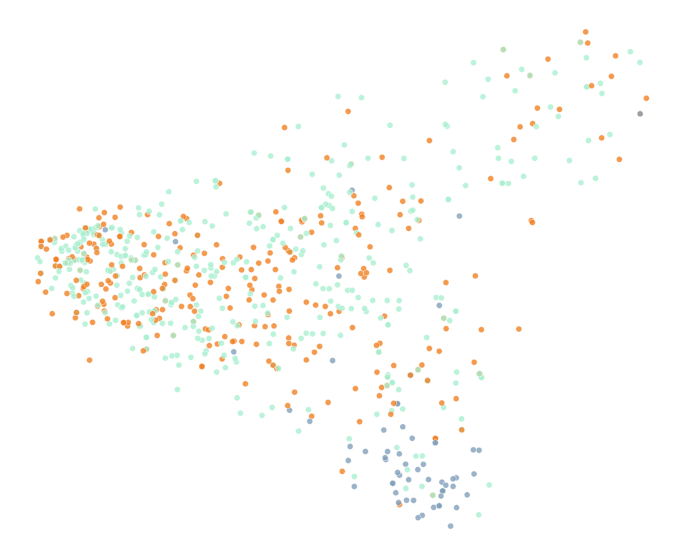

In [363]:
plt.figure(figsize= (12,10))
sns.scatterplot(data = concepts_pca,
               x = 'PC1',
               y = 'PC2',
               hue = 'language', 
               palette = colors, 
               legend= False, 
               alpha = 0.8)
sns.despine()
# Loop through the data points 
#for word in highlight:
#    x = concepts_pca.loc[concepts_pca['word'] == word, 'PC1']
#    y = concepts_pca.loc[concepts_pca['word'] == word, 'PC2']
#    text = concepts_pca.loc[concepts_pca['word'] == word, 'en_word'].any()
#    plt.text(x, y, text, size = 15, color = 'white')
plt.axis('off')
#plt.show()
plt.savefig('semantic_space_no_words.png', transparent = True)

#### Animated scatterplot

In [361]:
list(concepts_pca.loc[concepts_pca['Leo_months'] == 12, 'word'])

['luna', 'Banane', 'Pepe']

In [365]:
for month in concepts_pca['Leo_months'].unique():
    plt.figure(figsize= (12,10))
    sns.scatterplot(data = concepts_pca.loc[concepts_pca['Leo_months'] <= month],
               x = 'PC1',
               y = 'PC2',
               hue = 'language', 
               palette = colors_dic, 
               legend= False, 
               alpha = 0.8)
    sns.despine()
    highlight =  list(concepts_pca.loc[concepts_pca['Leo_months'] == month, 'word'])
    plt.xlim(-3,4)
    plt.ylim(-4,4)
    for word in highlight:
        x = concepts_pca.loc[concepts_pca['word'] == word, 'PC1']
        y = concepts_pca.loc[concepts_pca['word'] == word, 'PC2']
        text = word
        plt.text(x, y, text, size = 14, color = 'white')
    plt.axis('off')
    img_name = f'imgs/semantic_space_{month}.png'
    plt.savefig(img_name,transparent = True)
    plt.close()

In [ ]:
from PIL import Image

def gen_frame(path):
    im = Image.open(path)
    alpha = im.getchannel('A')

    # Convert the image into P mode but only use 255 colors in the palette out of 256
    im = im.convert('RGB').convert('P', palette=Image.ADAPTIVE, colors=255)

    # Set all pixel values below 128 to 255 , and the rest to 0
    mask = Image.eval(alpha, lambda a: 255 if a <=128 else 0)

    # Paste the color of index 255 and use alpha as a mask
    im.paste(255, mask)

    # The transparency index is 255
    im.info['transparency'] = 255

    return im


im1 = gen_frame('frame1.png')
im2 = gen_frame('frame2.png')        
im1.save('GIF.gif', save_all=True, append_images=[im2], loop=5, duration=200)

In [366]:
import imageio

images = []

for month in concepts_pca['Leo_months'].unique():
    filename = f'imgs/semantic_space_{month}.png'
    images.append(imageio.imread(filename))

imageio.mimsave('output_word_transparent.gif', images, fps=1)

In [278]:
import plotly.express as px


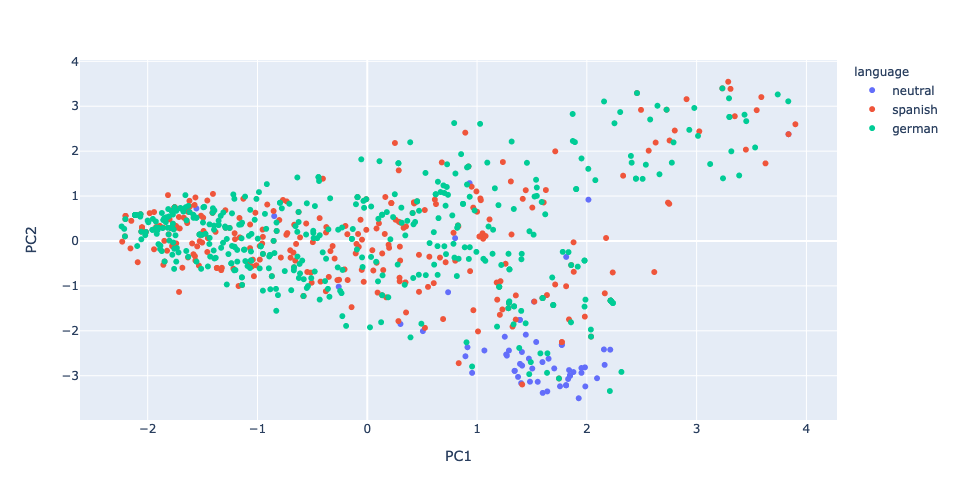

In [244]:
px.scatter(concepts_pca,
           x = 'PC1',
           y = 'PC2',
           #animation_frame= 'Leo_months',
           color = 'language',
           width = 800,
           height= 500,
           #range_x = [30, 65],
           #range_y = [10,25],
           #text = 'word')
           hover_name= 'word')